<h2 style="color:#86ADDC">Machine Learning and AI for FinTech</h2>
<h3 style="color:#86ADDC">Unsupervised Learning</h3>

<h2 style="color:#86ADDC">1. Principle Component Analysis (PCA)</h2>

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 

In [2]:
etf_data = pd.read_csv("ETFs.csv", encoding = 'latin1')
print(etf_data.head())

  fund_symbol                 fund_extended_name  \
0        1305                    Daiwa ETF TOPIX   
1        1306                   Nomura TOPIX ETF   
2        1308  Nikko Exchange Traded Index TOPIX   
3        1310            Daiwa ETF TOPIX Core 30   
4        1311           Nomura TOPIX Core 30 ETF   

                      fund_family inception_date  \
0   Daiwa Asset Management Co Ltd     11/07/2001   
1  Nomura Asset Management Co Ltd     11/07/2001   
2   Nikko Asset Management Co Ltd     20/12/2001   
3   Daiwa Asset Management Co Ltd     28/03/2002   
4  Nomura Asset Management Co Ltd     02/04/2002   

                                 investment_strategy investment_type  \
0  The investment seeks to track the price and yi...           Blend   
1  The investment seeks to track the price and yi...           Blend   
2  The investment seeks to track the price and yi...           Blend   
3  The investment seeks to track the price and yi...           Blend   
4  The investm

In [3]:
# Abstract 6 variables for demonstration
abstracted_etf_data = etf_data[['price_earnings_ratio', 'price_book_ratio', 'price_sales_ratio', 'price_cashflow_ratio', 'net_asset_value', 'fund_yield']]
print(abstracted_etf_data.head(5))

   price_earnings_ratio  price_book_ratio  price_sales_ratio  \
0                 12.92              1.18               0.81   
1                 12.92              1.18               0.81   
2                 12.92              1.18               0.81   
3                 11.34              1.12               1.07   
4                 11.34              1.12               1.07   

   price_cashflow_ratio  net_asset_value  fund_yield  
0                  5.41     4.010000e+12        1.84  
1                  5.41     8.430000e+12        1.77  
2                  5.44     3.730000e+12        1.84  
3                  4.06     1.920000e+09        2.57  
4                  4.07     3.260000e+09        1.82  


In [4]:
# A quick check on if Any missing values?
print(abstracted_etf_data.isnull().values.any())
# print the sum of missing values in the data
print(abstracted_etf_data.isnull().sum())

True
price_earnings_ratio    289
price_book_ratio        238
price_sales_ratio       230
price_cashflow_ratio    281
net_asset_value          16
fund_yield                0
dtype: int64


In [5]:
# There are various options in dealing with missing values. 
# Basically, we discuss two types
# First, we delete the missing entries
# Second, we fill in and replace the missing value with some number like mean, median, etc.
# Reference: https://github.com/matthewbrems/ODSC-missing-data-may-18/blob/master/Analysis%20with%20Missing%20Data.pdf

# Here we fill up the missing value by column median
abstracted_etf_data['price_earnings_ratio'].fillna(abstracted_etf_data['price_earnings_ratio'].median(), inplace=True)
abstracted_etf_data['price_book_ratio'].fillna(abstracted_etf_data['price_book_ratio'].median(), inplace=True)
abstracted_etf_data['price_sales_ratio'].fillna(abstracted_etf_data['price_sales_ratio'].median(), inplace=True)
abstracted_etf_data['price_cashflow_ratio'].fillna(abstracted_etf_data['price_cashflow_ratio'].median(), inplace=True)
abstracted_etf_data['net_asset_value'].fillna(abstracted_etf_data['net_asset_value'].median(), inplace=True)

C:\Users\joozk\AppData\Local\Temp\ipykernel_33164\2191176628.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  abstracted_etf_data['price_earnings_ratio'].fillna(abstracted_etf_data['price_earnings_ratio'].median(), inplace=True)
C:\Users\joozk\AppData\Local\Temp\ipykernel_33164\2191176628.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [6]:
scaled_etf_data = preprocessing.scale(abstracted_etf_data)
pca = PCA(n_components=6)
pca.fit(scaled_etf_data)
# generate coordinate for PCA graph based on the loading scores and scaled data
pca_data = pca.transform(scaled_etf_data) 
# calculate the percentage of variation in each PC
per_variation = np.round(pca.explained_variance_ratio_*100, decimals=1)
print(per_variation)

[54.8 16.8 14.5  7.2  3.8  2.8]


c:\Users\joozk\OneDrive\Desktop\PCA\venv\Lib\site-packages\sklearn\preprocessing\_data.py:258: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


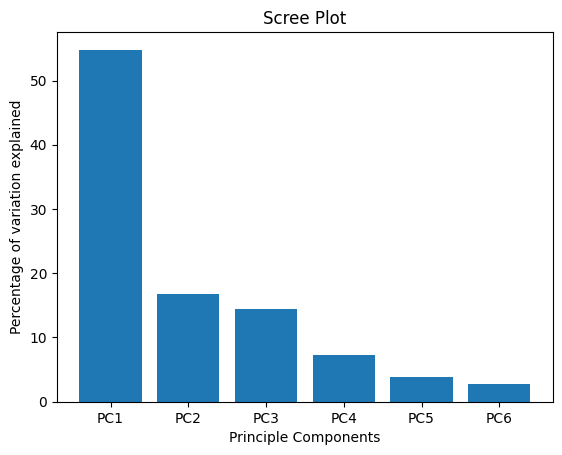

In [7]:
# Scree Plot
labels = ['PC' + str(x) for x in range(1, len(per_variation) + 1)]
scree_plot = plt.bar(x=range(1, len(per_variation) + 1), height=per_variation, tick_label=labels)
plt.xlabel('Principle Components')
plt.ylabel('Percentage of variation explained')
plt.title('Scree Plot')
plt.show()

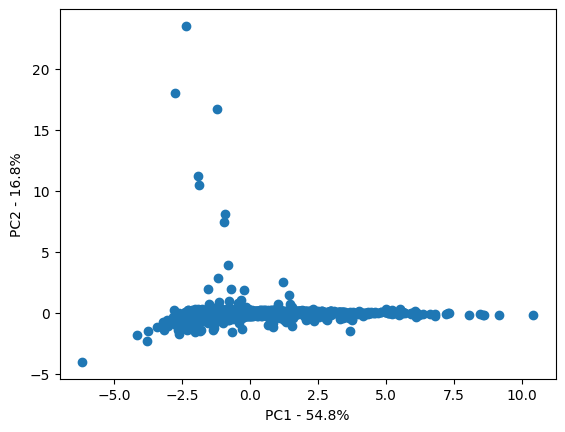

In [8]:
# Create 2-D PCA plot
pca_etf = pd.DataFrame(pca_data, columns=labels)

plt.scatter(pca_etf.PC1, pca_etf.PC2)
plt.xlabel('PC1 - {0}%'.format(per_variation[0]))
plt.ylabel('PC2 - {0}%'.format(per_variation[1]))
plt.show()

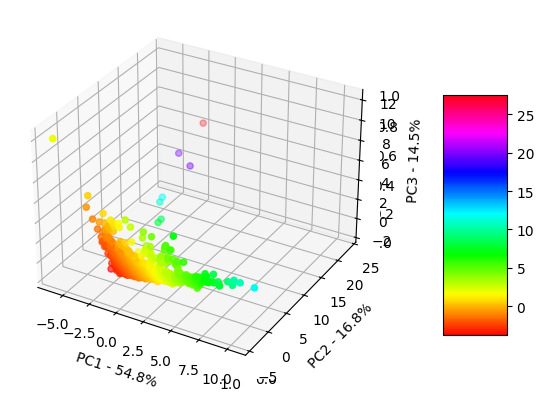

In [9]:
# Create 3-D PCA plot
%matplotlib inline
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')

# Data for a three-dimensional line


# Data for three-dimensional scattered points
pca_etf = pd.DataFrame(pca_data, columns=labels)

# Creating color map
my_cmap = plt.get_cmap('hsv')

pca_sct = ax.scatter3D(pca_etf.PC1, pca_etf.PC2, pca_etf.PC3, c=pca_etf.PC1 + pca_etf.PC2 + pca_etf.PC3, cmap=my_cmap);

ax.set_xlabel('PC1 - {0}%'.format(per_variation[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_variation[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_variation[2]))
fig.colorbar(pca_sct, ax = ax, shrink = 0.6, aspect = 3, cax=fig.add_axes([0.9, 0.2, 0.1, 0.5]))
plt.show()

In [10]:
# rotate the axes and update
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

<h2 style="color:#86ADDC">2. Clustering Methods</h2>

<h3 style="color:#86ADDC">2.1 K-means Clustering</h3>

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

Text(0, 0.5, 'X1')

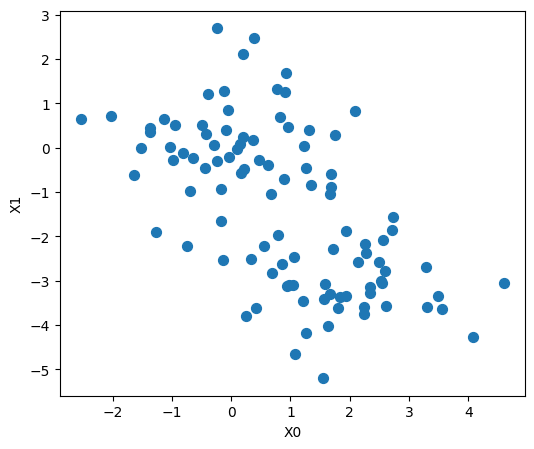

In [12]:
# For the demonstration purpose, I simulate a sample with two clusters
# The first cluster of observations have a relative shift in mean of second cluster
np.random.seed(111)
X = np.random.randn(100,2)
X[0:50, 0] = X[0:50, 0] + 2
X[0:50, 1] = X[0:50, 1] - 3

f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X[:,0], X[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

In [13]:
from sklearn.cluster import KMeans
# K-means with 2 clusters and a random initial state assignment of centroid specified as 111
kmeans_clustering = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans_clustering.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0, 0.5, 'X1')

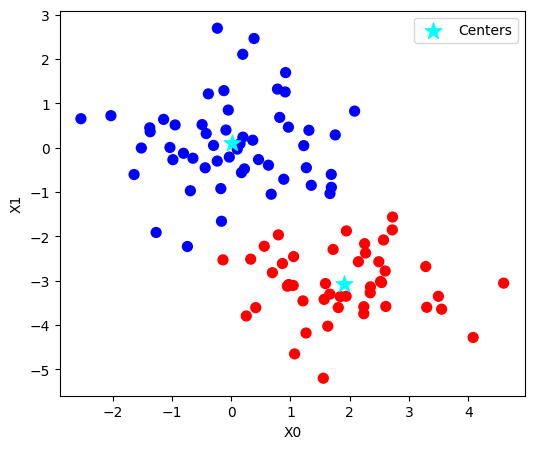

In [14]:
# Plot the identified clusters into different colors
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s = 50, c = kmeans_clustering.labels_, cmap = plt.cm.bwr) 
plt.scatter(kmeans_clustering.cluster_centers_[:, 0], 
            kmeans_clustering.cluster_centers_[:, 1], 
            marker = '*', 
            s = 150,
            color = 'cyan', 
            label = 'Centers')
plt.legend(loc = 'best')
plt.xlabel('X0')
plt.ylabel('X1')

Text(0, 0.5, 'X1')

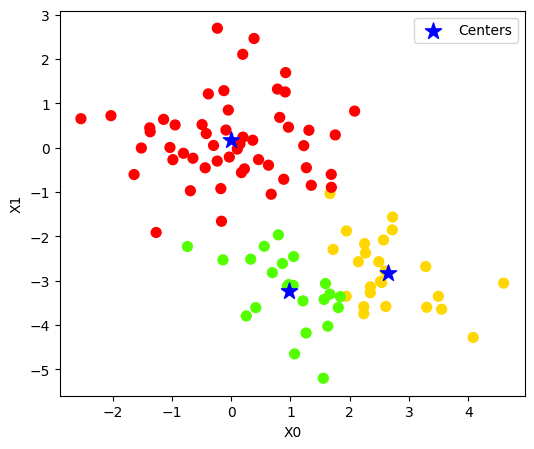

In [15]:
# In this example, we knew that there really were two clusters because we generated the data. However, for real data, in general we do not know the true number of clusters. We could instead have performed K-means clustering by trying out different values of K. 
# For instance, we try K=3

kmeans_3_clustering = KMeans(n_clusters = 3, random_state = 111)
kmeans_3_clustering.fit(X)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], s=50, c=kmeans_3_clustering.labels_, cmap=plt.cm.prism) 
plt.scatter(kmeans_3_clustering.cluster_centers_[:, 0], kmeans_3_clustering.cluster_centers_[:, 1], marker='*', s=150,
            color='blue', label='Centers')
plt.legend(loc='best')
plt.xlabel('X0')
plt.ylabel('X1')

In [16]:
# To run the Kmeans() function in python with multiple initial cluster assignments, we use the n_init argument (default: 10). If a value of n_init greater than one is used, then K-means clustering will be performed using multiple random assignments, and the Kmeans() function will report only the best results. Here we compare using n_init = 1:

km_out_single_run = KMeans(n_clusters = 3, n_init = 1, random_state = 123).fit(X)
km_out_single_run.inertia_

142.84748586615498

In [17]:
# Note that .inertia_ is the total within-cluster sum of squares, which we seek to minimize by performing K-means clustering.
km_out_single_run = KMeans(n_clusters = 3, n_init = 20, random_state = 123).fit(X)
km_out_single_run.inertia_

142.80122647546665

In [18]:
# It is generally recommended to always run K-means clustering with a large value of n_init, such as 20 or 50 to avoid getting stuck in an undesirable local optimum.

# When performing K-means clustering, in addition to using multiple initial cluster assignments, it is also important to set a random seed using the random_state parameter. This way, the initial cluster assignments can be replicated, and the K-means output will be fully reproducible.

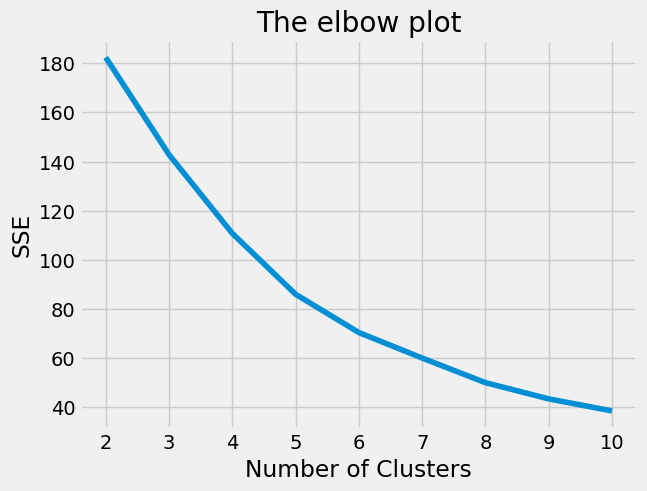

In [19]:
# 1. Elbow method
from sklearn.cluster import KMeans

kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 111,
   }

# A list holds the SSE values for each k
sse = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sse)
plt.title('The elbow plot')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [20]:
!pip install kneed
# https://github.com/arvkevi/kneed
# Identify the optimal elbow point programatically
from kneed import KneeLocator
kl = KneeLocator(range(2, 11), sse, curve="convex", direction="decreasing")

kl.elbow

np.int64(5)

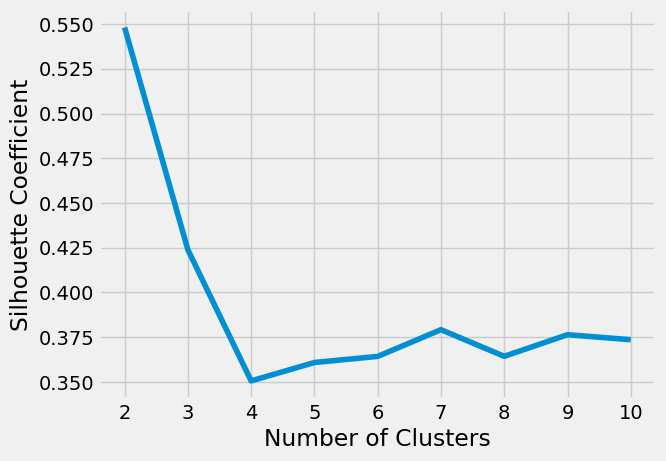

In [21]:
# 2. silhouette coefficients

from sklearn.metrics import silhouette_score

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

<h3 style="color:#86ADDC">2.2 Hierarchical Clustering</h3>

Text(0, 0.5, 'X1')

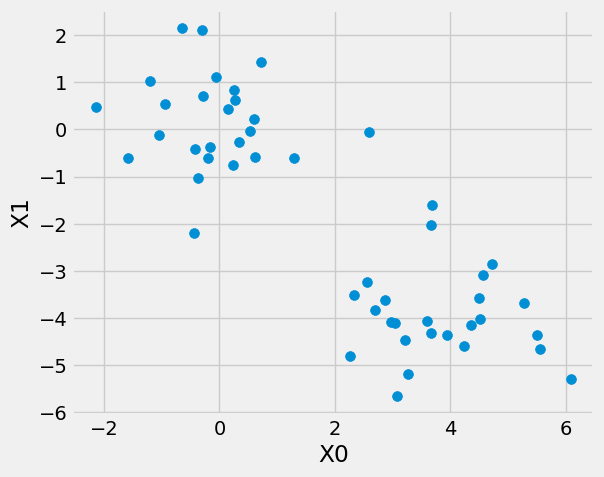

In [22]:
np.random.seed(111)
n = 50
m = int(n/2)
X_data = np.random.randn(n,2)
X_data[0:m, 0] = X_data[0:m, 0] + 4
X_data[0:m, 1] = X_data[0:m, 1] - 4

f, ax = plt.subplots(figsize=(6, 5))
ax.scatter(X_data[:,0], X_data[:,1], s=50) 
ax.set_xlabel('X0')
ax.set_ylabel('X1')

In [23]:
# The linkage() function from scipy implements several clustering functions in python. In the following example we use the data from the previous section to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. We begin by clustering observations using complete linkage:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(X_data, 'complete')
hc_average = linkage(X_data, "average")
hc_single = linkage(X_data, "single")

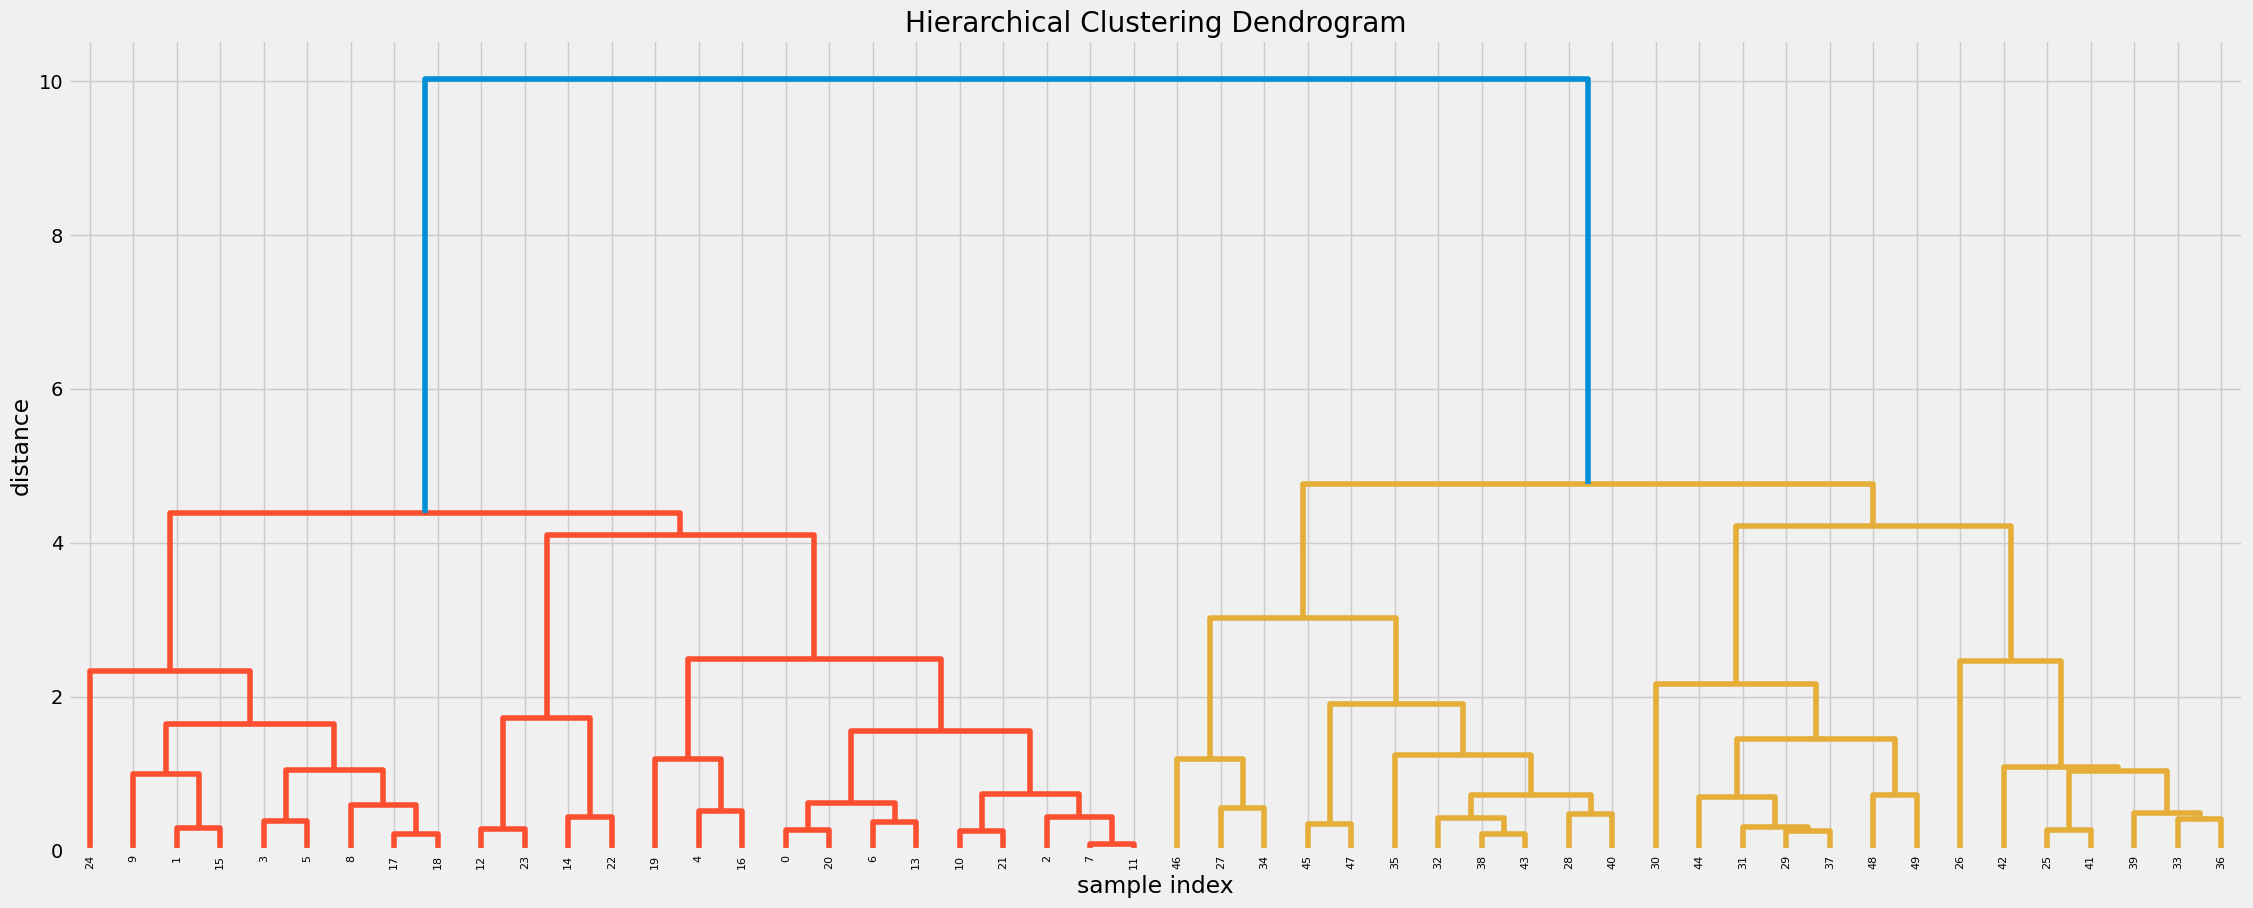

In [24]:
# We can now plot the dendrograms obtained using the usual dendrogram() function. The numbers at the bottom of the plot identify each observation:

from scipy.cluster.hierarchy import dendrogram

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    hc_complete,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [25]:
# To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the cut_tree() function:

from scipy.cluster.hierarchy import cut_tree
print(cut_tree(hc_complete, n_clusters = 2).T) # Printing transpose just for space

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
